In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Draw inline
%matplotlib inline

# Data Exploration

### Missing Values

In [52]:
countries = pd.read_csv("countries.csv")
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [53]:
train_users = pd.read_csv('train_users_2.csv')
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [9]:
age_gender_bkts = pd.read_csv('age_gender_bkts.csv')

In [10]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


We keep the explorations simple for now by only looking at the train users dataset which contains our target variable too.

In [11]:
train_users['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

We should replace -unknown- with NaN to measure the null values.

In [54]:
train_users.gender.replace('-unknown-', np.nan, inplace=True)
train_users['gender'].value_counts()

FEMALE    63041
MALE      54440
OTHER       282
Name: gender, dtype: int64

In [55]:
#users_nan = (users.isnull().sum() / users.shape[0]) * 100
nan_percents = train_users.isnull().sum() * 100 / train_users.shape[0] 
nan_percents

id                          0.000000
date_account_created        0.000000
timestamp_first_active      0.000000
date_first_booking         58.347349
gender                     44.829024
age                        41.222576
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     2.841402
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
dtype: float64

We will create a clean training set without missing values.

In [56]:
train_users_clean = train_users.dropna()
train_users_clean.isnull().sum() * 100 / train_users_clean.shape[0]

id                         0.0
date_account_created       0.0
timestamp_first_active     0.0
date_first_booking         0.0
gender                     0.0
age                        0.0
signup_method              0.0
signup_flow                0.0
language                   0.0
affiliate_channel          0.0
affiliate_provider         0.0
first_affiliate_tracked    0.0
signup_app                 0.0
first_device_type          0.0
first_browser              0.0
country_destination        0.0
dtype: float64

In [15]:
train_users_clean['age'].describe()

count    56192.000000
mean        48.532033
std        153.592744
min          2.000000
25%         28.000000
50%         33.000000
75%         41.000000
max       2014.000000
Name: age, dtype: float64

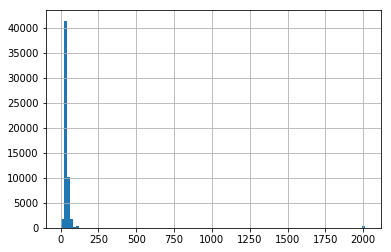

In [16]:
train_users_clean['age'].hist(bins = 100)

In [17]:
train_users_clean.loc[train_users_clean['age'] > 100, 'age'].value_counts()

105.0     376
2014.0    308
110.0      44
2013.0     15
104.0      10
102.0      10
101.0       7
107.0       6
103.0       5
109.0       4
108.0       3
106.0       2
111.0       2
115.0       2
1947.0      2
1929.0      2
1924.0      2
1949.0      2
1932.0      2
1936.0      1
132.0       1
1938.0      1
1931.0      1
113.0       1
1942.0      1
1935.0      1
2008.0      1
1926.0      1
150.0       1
Name: age, dtype: int64

In [18]:
train_users_clean.loc[train_users_clean['age'] < 18, 'age'].value_counts()

5.0     4
17.0    3
15.0    2
16.0    1
2.0     1
4.0     1
Name: age, dtype: int64

We will drop spurious ages (smaller than 18 and greater than 100).

In [57]:
train_users_clean = train_users_clean[train_users_clean.age>18]
train_users_clean = train_users_clean[train_users_clean.age<100]
train_users_clean['age'].describe()

count    55186.000000
mean        36.051625
std         11.029252
min         19.000000
25%         28.000000
50%         33.000000
75%         41.000000
max         99.000000
Name: age, dtype: float64

## Visualization

### Gender

Firstly, we will see if the gender plays any role in the final destination chosen.

In [20]:
men_sum = sum(train_users_clean.gender == 'MALE')
women_sum = sum(train_users_clean.gender == 'FEMALE')
other_sum = sum(train_users_clean.gender == 'OTHER')

In [21]:
female_destinations = train_users_clean.loc[train_users_clean['gender'] == 'FEMALE', 'country_destination'].value_counts()/women_sum
female_destinations

US       0.710767
other    0.098108
FR       0.060771
IT       0.033818
GB       0.027635
ES       0.026986
CA       0.014176
DE       0.011000
NL       0.007788
AU       0.006559
PT       0.002391
Name: country_destination, dtype: float64

In [22]:
male_destinations = train_users_clean.loc[train_users_clean['gender'] == 'MALE', 'country_destination'].value_counts()/men_sum
male_destinations

US       0.704357
other    0.124058
FR       0.047488
IT       0.024656
GB       0.024540
ES       0.023880
CA       0.017046
DE       0.014910
NL       0.009940
AU       0.006679
PT       0.002446
Name: country_destination, dtype: float64

In [23]:
other_destinations = train_users_clean.loc[train_users_clean['gender'] == 'OTHER', 'country_destination'].value_counts()/other_sum
other_destinations

US       0.645570
other    0.120253
FR       0.082278
IT       0.031646
ES       0.025316
CA       0.025316
GB       0.018987
DE       0.018987
NL       0.018987
AU       0.006329
PT       0.006329
Name: country_destination, dtype: float64

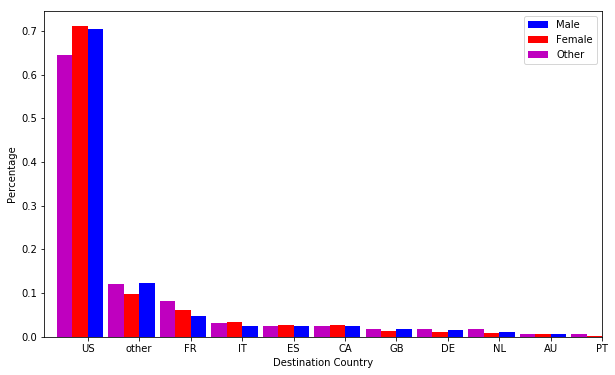

In [24]:
plt.figure(figsize=(10,6))
width = 0.3
male_destinations.plot(kind='bar', width=width, color='b', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='r', position=1, label='Female', rot=0)
other_destinations.plot(kind='bar', width=width, color='m', position=2, label='Other', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.show()

It seems that there are no striking differences between genders when choosing destinations.

### Age

Now we will explore whether age alone plays any role in the final destination.

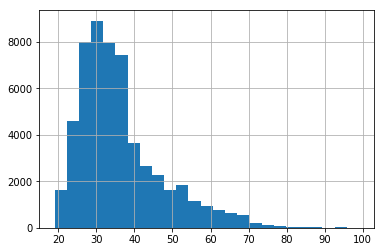

In [25]:
train_users_clean['age'].hist(bins = 25)

In [26]:
below_30_sum = sum(train_users_clean['age'] < 30)
between_30_50_sum = sum((train_users_clean['age'] >= 30) & (train_users_clean['age'] < 50))
above_50_sum = sum(train_users_clean['age'] >= 50)

In [27]:
below_30_dest = train_users_clean.loc[train_users_clean['age'] < 30, 'country_destination'].value_counts()/below_30_sum
between_30_50_dest = train_users_clean[((train_users_clean['age'] >= 30) & (train_users_clean['age'] < 50))]['country_destination'].value_counts()/between_30_50_sum
above_50_dest = train_users_clean[(train_users_clean['age'] >= 50)]['country_destination'].value_counts()/above_50_sum

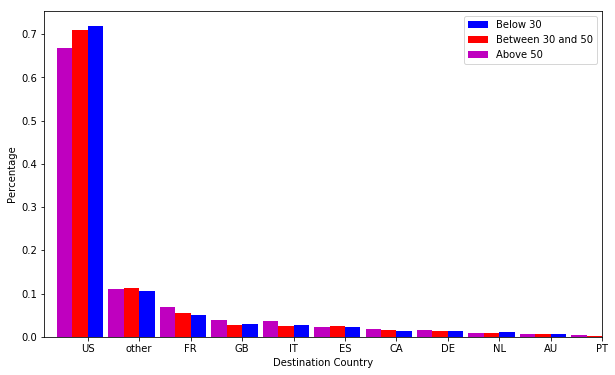

In [28]:
plt.figure(figsize=(10,6))
width = 0.3
below_30_dest.plot(kind='bar', width=width, color='b', position=0, label='Below 30', rot=0)
between_30_50_dest.plot(kind='bar', width=width, color='r', position=1, label='Between 30 and 50', rot=0)
above_50_dest.plot(kind='bar', width=width, color='m', position=2, label='Above 50', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.show()

Again age does not seem to be a factor based on which we can predict the destination, since there are no strikind differences between age groups.

In [29]:
train_users_clean['country_destination'].value_counts() * 100 / train_users_clean.shape[0]

US       70.758888
other    11.028159
FR        5.463342
IT        2.953648
GB        2.616606
ES        2.553184
CA        1.554742
DE        1.284746
NL        0.882470
AU        0.661400
PT        0.242815
Name: country_destination, dtype: float64

In [30]:
train_users_clean['language'].value_counts() * 100 /  train_users_clean.shape[0]

en    97.301852
zh     0.619722
fr     0.482006
es     0.338854
de     0.306237
ko     0.233755
ru     0.152213
it     0.139528
ja     0.101475
pt     0.092415
sv     0.059798
nl     0.032617
tr     0.028993
da     0.027181
pl     0.019933
no     0.019933
fi     0.010872
el     0.009060
cs     0.007248
hu     0.005436
is     0.003624
ca     0.003624
th     0.003624
Name: language, dtype: float64

We can easily see that the dataset is skewed with most of the users speaking english and going to the US, which implies that most of the users are from the US.

### Language

Finally we will test if the language is an important factor when choosing the destination. We will test this using a few major languages.

In [31]:
en_sum = sum(train_users_clean['language'] == 'en')
fr_sum = sum(train_users_clean['language'] == 'fr')
de_sum = sum(train_users_clean['language'] == 'de')
es_sum = sum(train_users_clean['language'] == 'es')
it_sum = sum(train_users_clean['language'] == 'it')

In [32]:
en_dest = train_users_clean[(train_users_clean['language'] == 'en')]['country_destination'].value_counts()/en_sum
fr_dest = train_users_clean[(train_users_clean['language'] == 'fr')]['country_destination'].value_counts()/fr_sum
de_dest = train_users_clean[(train_users_clean['language'] == 'de')]['country_destination'].value_counts()/de_sum
es_dest = train_users_clean[(train_users_clean['language'] == 'es')]['country_destination'].value_counts()/es_sum
it_dest = train_users_clean[(train_users_clean['language'] == 'it')]['country_destination'].value_counts()/it_sum

In [33]:
fr_dest

US       0.635338
FR       0.154135
other    0.052632
ES       0.037594
IT       0.030075
GB       0.026316
CA       0.018797
DE       0.018797
NL       0.011278
AU       0.007519
PT       0.007519
Name: country_destination, dtype: float64

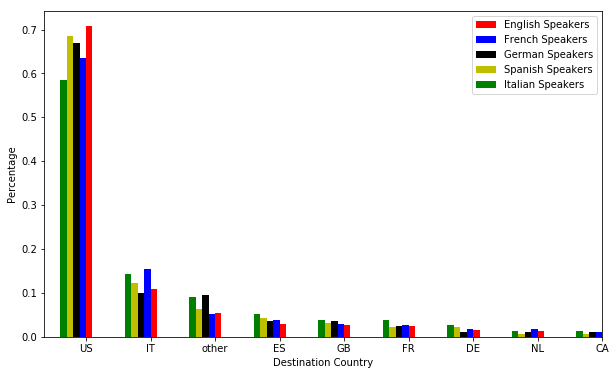

In [34]:
plt.figure(figsize=(10,6))
width = 0.1

en_dest.plot(kind='bar', width=width, color='r', position=0, label='English Speakers', rot=0)
fr_dest.plot(kind='bar', width=width, color='b', position=1, label='French Speakers', rot=0)
de_dest.plot(kind='bar', width=width, color='k', position=2, label='German Speakers', rot=0)
es_dest.plot(kind='bar', width=width, color='y', position=3, label='Spanish Speakers', rot=0)
it_dest.plot(kind='bar', width=width, color='g', position=4, label='Italian Speakers', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.show()

# Data Preprocessing 

## One-Hot encoding on categorical variables 

In [35]:
train_users_clean.affiliate_provider.value_counts()

direct                 36686
google                 12610
other                   3329
craigslist               885
facebook                 567
bing                     478
padmapper                175
vast                     147
facebook-open-graph      113
yahoo                     93
meetup                    33
gsp                       28
email-marketing           23
naver                      8
baidu                      7
yandex                     4
Name: affiliate_provider, dtype: int64

In [36]:
train_users_cat = train_users_clean.iloc[:,[4,5,6,8,12,13,14,15]]
train_users_cat.head()

,gender,age,signup_method,language,signup_app,first_device_type,first_browser,country_destination
2,FEMALE,56.0,basic,en,Web,Windows Desktop,IE,US
3,FEMALE,42.0,facebook,en,Web,Mac Desktop,Firefox,other
6,FEMALE,46.0,basic,en,Web,Mac Desktop,Safari,US
7,FEMALE,47.0,basic,en,Web,Mac Desktop,Safari,US
8,FEMALE,50.0,basic,en,Web,Mac Desktop,Safari,US


In [37]:
#keep only string type categorical variables to do one hot encoding
train_users_cat = train_users_cat.select_dtypes(include=[object])
train_users_cat.head()

,gender,signup_method,language,signup_app,first_device_type,first_browser,country_destination
2,FEMALE,basic,en,Web,Windows Desktop,IE,US
3,FEMALE,facebook,en,Web,Mac Desktop,Firefox,other
6,FEMALE,basic,en,Web,Mac Desktop,Safari,US
7,FEMALE,basic,en,Web,Mac Desktop,Safari,US
8,FEMALE,basic,en,Web,Mac Desktop,Safari,US


In [58]:
from sklearn import preprocessing

#transform to integer valued labels before doing one hot encoding
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
train_users_cat_2 = train_users_cat.apply(le.fit_transform)
train_users_cat_2.head()

,gender,signup_method,language,signup_app,first_device_type,first_browser,country_destination
2,0,0,5,2,6,12,9
3,0,1,5,2,3,11,10
6,0,0,5,2,3,26,9
7,0,0,5,2,3,26,9
8,0,0,5,2,3,26,9


In [75]:
train_users_cat_2['country_destination'].value_counts()/train_users_cat_2['country_destination'].value_counts().sum()

9     0.707589
10    0.110282
4     0.054633
6     0.029536
5     0.026166
3     0.025532
1     0.015547
2     0.012847
7     0.008825
0     0.006614
8     0.002428
Name: country_destination, dtype: float64

In [59]:
le.classes_

array(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT', 'US',
       'other'], dtype=object)

In [76]:
le.inverse_transform([[0],[10]])

/Users/dvamvou/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['AU', 'other'], dtype=object)

In [77]:
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(train_users_cat_2)

# 3. Transform
onehotlabels = enc.transform(train_users_cat_2).toarray()
onehotlabels.shape

/Users/dvamvou/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(55186, 88)

In [78]:
ages = train_users_clean['age'].as_matrix()
ages = ages.reshape((55186,1))

/Users/dvamvou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [79]:
train_users_one_hot = np.hstack((ages,onehotlabels))
train_users_one_hot.shape

(55186, 89)

In [80]:
train_users_one_hot

array([[56.,  1.,  0., ...,  0.,  1.,  0.],
       [42.,  1.,  0., ...,  0.,  0.,  1.],
       [46.,  1.,  0., ...,  0.,  1.,  0.],
       ...,
       [34.,  1.,  0., ...,  0.,  0.,  0.],
       [36.,  1.,  0., ...,  0.,  1.,  0.],
       [23.,  1.,  0., ...,  0.,  1.,  0.]])

In [81]:
class_number = le.classes_.size

In [82]:
X = train_users_one_hot[:,:-class_number]
X.shape

(55186, 78)

In [83]:
y = train_users_one_hot[:,-class_number:]
y.shape

(55186, 11)

# Prediction

In [84]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)


(41389, 78)
(13797, 78)
(41389, 11)
(13797, 11)


## Logistic Regression 

In [85]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')#LogisticRegression(multi_class="multinomial",penalty='l1', solver='saga', C=1)
softmax_reg.fit(X_train, y_train)


ValueError: bad input shape (41389, 11)

In [ ]:
a = np.array([0,1,2,4,5,6,7,8])
a

In [ ]:
a[-1:]

## Random Forest 

In [50]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=1000, max_depth=30, max_features = 45, n_jobs=-1)
rnd_clf.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
rnd_clf.score(X_train, y_train)

In [ ]:
rnd_clf.score(X_val, y_val)

We could do some grid search to find the optimal parameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#'max_depth': [5, 10, 15], 
param_grid = [
        {'n_estimators': [100, 500], 'max_features': [40, 60], 'n_jobs': [-1]}
]
rnf_clf = RandomForestClassifier()
rnf_clf_cv = GridSearchCV(estimator = rnf_clf, param_grid = param_grid, cv=1)
rnf_clf_cv.fit(X_train, y_train)
print(rnf_clf_cv.best_params_)


### Feature Selection 

In [ ]:
#feature selection, grid search, without one hot, ada boost 
rnd_clf.feature_importances_

## Trying random forests without One-Hot endoding

In [60]:
train_only_le = np.hstack((ages, train_users_cat_2.values))
X_only_le = train_only_le[:,:-1]
y_only_le = train_only_le[:,-1:]

In [61]:
X_train_le, X_val_le, y_train_le, y_val_le = train_test_split(X_only_le, y_only_le, test_size=0.25, random_state=42)
y_val_le.shape

(13797, 1)

In [ ]:
from sklearn.model_selection import GridSearchCV
#'max_depth': [5, 10, 15], 
param_grid = [
        {'n_estimators': [100, 200, 500], 'max_depth': [1, 2, 3, 5], 'max_features': [2, 3, 6], 'n_jobs': [-1]}
]
rnf_clf = RandomForestClassifier()
rnf_clf_cv = GridSearchCV(estimator = rnf_clf, param_grid = param_grid, cv=3)
rnf_clf_cv.fit(X_train_le, y_train_le)
print(rnf_clf_cv.best_params_)

In [62]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=1, max_features = 2, n_jobs=-1)
rnd_clf.fit(X_train_le, y_train_le)
print(rnd_clf.score(X_train_le, y_train_le))
print(rnd_clf.score(X_val_le, y_val_le))


/Users/dvamvou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.7085940708884003
0.7045734579981155


In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

In [68]:
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=100)
gbrt.fit(X_train_le, y_train_le)
print(gbrt.score(X_train_le, y_train_le))
print(gbrt.score(X_val_le, y_val_le))
"""
errors = [log_loss(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val_le)]
bst_n_estimators = np.argmin(errors)
bst_n_estimators
"""

/Users/dvamvou/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7088356809780376
0.7043560194245125


'\nerrors = [log_loss(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val_le)]\nbst_n_estimators = np.argmin(errors)\nbst_n_estimators\n'

In [86]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')#LogisticRegression(multi_class="multinomial",penalty='l1', solver='saga', C=1)
softmax_reg.fit(X_train_le, y_train_le)



/Users/dvamvou/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dvamvou/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
print(softmax_reg.score(X_train_le, y_train_le))
print(softmax_reg.score(X_val_le, y_val_le))

0.7085940708884003
0.7045734579981155


In [92]:
softmax_reg.predict(X_train_le).min()

9.0